# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
print(fraud['fraud'].value_counts(normalize=True))

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


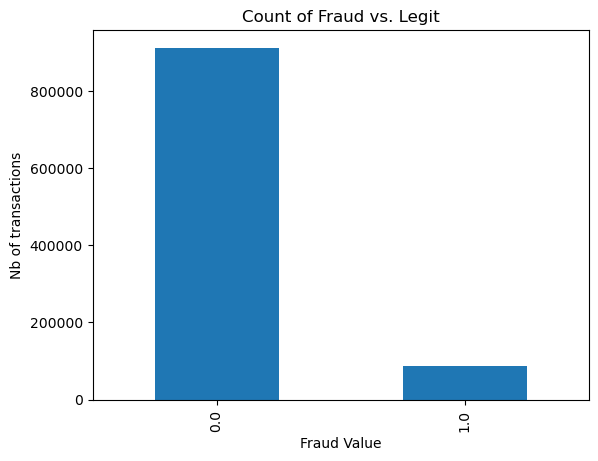

In [4]:
import matplotlib.pyplot as plt

# Get the counts of each unique value in the 'fraud' column
value_counts = fraud['fraud'].value_counts()

# Plot the counts
value_counts.plot(kind='bar')
plt.xlabel('Fraud Value')
plt.ylabel('Nb of transactions')
plt.title('Count of Fraud vs. Legit')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression   
from sklearn.preprocessing import StandardScaler  
features= fraud.drop('fraud', axis=1)  
target= fraud['fraud']  
  
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=0)  
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=100)  
lr_model.fit(X_train_sc, y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix 
  
y_pred = lr_model.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000


Confusion Matrix:
[[181344   1271]
 [  6886  10499]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler  
  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)  


scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_sc, y_train)  


lr_model_reso = LogisticRegression(max_iter=100)  
lr_model_reso.fit(X_res, y_res)


y_pred_reso = lr_model_reso.predict(X_test_sc)



In [ ]:
accuracy = accuracy_score(y_test, y_pred_reso)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_reso, average='weighted')
recall = recall_score(y_test, y_pred_reso, average='weighted')
f1 = f1_score(y_test, y_pred_reso, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_reso))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_reso))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)  

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_res_u, y_res_u = ros.fit_resample(X_train_sc, y_train)  

lr_model_resu = LogisticRegression(max_iter=100)  
lr_model_resu.fit(X_res_u, y_res_u)
y_pred_resu = lr_model_resu.predict(X_test_sc)

In [ ]:

accuracy = accuracy_score(y_test, y_pred_resu)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_resu, average='weighted')
recall = recall_score(y_test, y_pred_resu, average='weighted')
f1 = f1_score(y_test, y_pred_resu, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_resu))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_resu))

In [ ]:
from imblearn.over_sampling import SMOTE  
  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)  

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

smote = SMOTE(random_state=42)  
X_res_sm, y_res_sm = smote.fit_resample(X_train_sc, y_train)  

lr_model_sm = LogisticRegression(max_iter=500, solver='saga')  # Increased max_iter and changed solver
lr_model_sm.fit(X_res_sm, y_res_sm)

y_pred_sm = lr_model_sm.predict(X_test_sc)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_sm)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_sm, average='weighted')
recall = recall_score(y_test, y_pred_sm, average='weighted')
f1 = f1_score(y_test, y_pred_sm, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_sm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sm))